## Data mining with twitter

how to download and install twitter API (must have a twitter account!)


http://bigcomputing.blogspot.com/2016/02/the-twitter-r-package-by-jeff-gentry-is.html

In [1]:
import csv
import os,re,csv
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim import corpora, models
import gensim
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import plotly.plotly as py
import twitter
import json

In [2]:
import pandas as pd

#### Here is the article on tweet collecton I mentioned before: "How to collect 1500 tweetes in a week"
https://www.researchgate.net/publication/301448985_Personality_Traits_on_Twitter-or-How_to_Get_1500_Personality_Tests_in_a_Week

There are recommendations on tweet collection and reference to website with their labelled dataset and some preprocessing tweets code (useful, we can use and quote the source), see below:


https://bitbucket.org/bplank/wassa2015/src/master/

Here we enter our Twitter credentials. These can be acquired through 

https://www.promptcloud.com/blog/scrape-twitter-data-using-python-r/

# PHASE I: Get familiar with twitter API


- (1) familirize with twitter API (some of stuff I have done , below)
 - Hopefully has done that




### Twitter data scrapping

In [5]:
## import more libraties
import tweepy
import csv
import json

In [351]:
import json

# create a dictionary to store your twitter credentials

twitter_cred = dict()

# Enter your own consumer_key, consumer_secret, access_key and access_secret
# Replacing the stars ("********")

twitter_cred['CONSUMER_KEY'] = '***'
twitter_cred['CONSUMER_SECRET'] = '******'
twitter_cred['ACCESS_KEY'] = '*************'
twitter_cred['ACCESS_SECRET'] = '***************'

# Save the information to a json so that it can be reused in code without exposing
# the secret info to public

with open('twitter_credentials1.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)
#Your saved json will look like the one shown below. It will be saved in the current directory under the name twitter_credentials.json.



#### you can view your credentials like this:

In [4]:
#twitter_cred1

#### ... or like this:

In [3]:
#!cat twitter_credentials.json

## LINK 
https://stackoverflow.com/questions/24163421/twitter-user-profile-can-be-extracted-by-this

In [57]:
!pwd

/Users/Natallia/Documents/R/W210_capstone/Project


## Using Twitter API to do search

In [61]:
api = twitter.Api(consumer_key='******',
                      consumer_secret='*********',
                      access_token_key='*************',
                      access_token_secret='**********************')

#It will print all your twitter profile data plus all your tweets!- uncomment below:

#print('my twitter info & tweete:','\n',api.VerifyCredentials())

### A) Search the Twitter API using keywords &  functions.

The Python twitter library has a lot of cool functions that you can use and learn about through the help() function




#### GetSearch function

In [14]:
help(api.GetSearch)

Help on method GetSearch in module twitter.api:

GetSearch(term=None, raw_query=None, geocode=None, since_id=None, max_id=None, until=None, since=None, count=15, lang=None, locale=None, result_type='mixed', include_entities=None, return_json=False) method of twitter.api.Api instance
    Return twitter search results for a given term. You must specify one
    of term, geocode, or raw_query.
    
    Args:
      term (str, optional):
        Term to search by. Optional if you include geocode.
      raw_query (str, optional):
        A raw query as a string. This should be everything after the "?" in
        the URL (i.e., the query parameters). You are responsible for all
        type checking and ensuring that the query string is properly
        formatted, as it will only be URL-encoded before be passed directly
        to Twitter with no other checks performed. For advanced usage only.
        *This will override any other parameters passed*
      since_id (int, optional):
        Ret

### Search by two keywords:"enfp","Briggs". 

In [360]:
search_1 = api.GetSearch(["enfp","Briggs"],count=100,lang='en')
tweets = [i.AsDict() for i in search_1]
### uncomment below to print tweets
#tweets

#### can do the same for other 15  MBTI types

#### Looking at tweets jason, one can see the structure and how  to produce any info about tweet

In [18]:
#print(tweets)

#### Can print tweets out ...

In [11]:

search = api.GetSearch(["salty chocolate caramel"],count=100,lang='en') 

#for tweet in search:
    #print(tweet.created_at,tweet.user.id,tweet.user.screen_name, tweet.user.name,tweet.text,tweet.user.profile_image_url)
    
#len(search)


### Exact phrase search

#### not sure it always works but it gets far less tweets than the one without douoble quotes

In [13]:
search_ex = api.GetSearch(['\"I am an enfp\"'],count=100,lang='en') 

for tweet in search_ex:
    print(tweet.created_at,tweet.user.id,tweet.user.screen_name, tweet.user.name,tweet.text,tweet.user.profile_image_url)
    


Sat Jun 15 14:26:31 +0000 2019 1069713189565317120 ukthxbyek ukthxbye is a writer and lawful disaster @youkeepmeright I have tried to understand it but just saying I am an ENFP seems easier lol http://pbs.twimg.com/profile_images/1135702016330625024/9sauXAQk_normal.png
Sat Jun 15 14:12:33 +0000 2019 780063477243211776 _shut_tf_up_ ᵤᵣₐₙᵢᵤₘ🖤💁🏽‍♀️ @sagistarbb Maybe it is an ENxP thing? 🤔

Because I can relate to your tweet and I am an ENFP (took it many times t… https://t.co/CXlqIFHt8O http://pbs.twimg.com/profile_images/1139883867920142336/dNIS2C_1_normal.png
Fri Jun 14 05:44:49 +0000 2019 3389698449 berozgarKisan shobhit k @Sophie2078 @120yearz I am an ENFP... We always have unicorns http://pbs.twimg.com/profile_images/1139150916223823872/t6jPVNk-_normal.jpg
Thu Jun 13 20:36:52 +0000 2019 1064558148621672449 2dancingpandas Dancing Pandas @nerd_backpack Awesome!  MBTI is useful for coaching.  I used to use it all the time to help people understand them… https://t.co/U3Dn0QLIYS http://pbs

In [14]:
print("exact phrase search for (I am an enfp), number of tweets =",len(search_ex))

exact phrase search for (I am an enfp), number of tweets = 9


#### Loose search :

In [8]:
search = api.GetSearch(["I am an enfp"],count=100,lang='en') 

for tweet in search:
    print(tweet.created_at,tweet.user.id,tweet.user.screen_name, tweet.user.name,tweet.text,tweet.user.profile_image_url)
    


Sat Jun 15 16:47:41 +0000 2019 957560260960514048 imbue_enfp Philosophical Slut This is a very stereotypical, narrow view of an INTJ, also you forget I’m bisexual so it’s both male and female INT… https://t.co/Iu74pQjiRI http://pbs.twimg.com/profile_images/1140185715273134081/Rivgyso7_normal.jpg
Sat Jun 15 14:26:31 +0000 2019 1069713189565317120 ukthxbyek ukthxbye is a writer and lawful disaster @youkeepmeright I have tried to understand it but just saying I am an ENFP seems easier lol http://pbs.twimg.com/profile_images/1135702016330625024/9sauXAQk_normal.png
Sat Jun 15 14:12:33 +0000 2019 780063477243211776 _shut_tf_up_ ᵤᵣₐₙᵢᵤₘ🖤💁🏽‍♀️ @sagistarbb Maybe it is an ENxP thing? 🤔

Because I can relate to your tweet and I am an ENFP (took it many times t… https://t.co/CXlqIFHt8O http://pbs.twimg.com/profile_images/1139883867920142336/dNIS2C_1_normal.png
Sat Jun 15 05:10:22 +0000 2019 9035362 kymwald Kym Wald @fairlyliterary I am weirdly an enfp 🤔😲 http://pbs.twimg.com/profile_images/1112830

37

In [15]:
print("NOT exact phrase search for (I am an enfp), number of tweets =",len(search))


NOT exact phrase search for (I am an enfp), number of tweets = 38


#### Instead of printing -   create panda df

In [16]:
search_1 = api.GetSearch(["enfp","Briggs"],count=100,lang='en')
tweets = [i.AsDict() for i in search_1]

In [17]:

tweettext = [i["text"] for i in tweets]
userID = [i['user']["id"] for i in tweets]

#userGen = [i['user']["description"] for i in tweets]
userPhoto = [i['user']["profile_image_url"] for i in tweets]

created = [i["created_at"] for i in tweets]
#tweettext
#userID
len(userID)

36

In [18]:
df_1 = pd.DataFrame({'user_ID':userID,'tweet_text':tweettext,'created_at':created ,'user_photo':userPhoto})


df_1.head()

,user_ID,tweet_text,created_at,user_photo
0,46880372,Took the Myers-Briggs personality test after 3...,Sun Jun 16 05:02:42 +0000 2019,http://pbs.twimg.com/profile_images/1139040167...
1,3037401183,i think i’m gonna retake my personality tests ...,Sun Jun 16 04:47:56 +0000 2019,http://pbs.twimg.com/profile_images/1137104788...
2,16343340,@droolbabie My Myers Briggs type always heckin...,Sun Jun 16 03:56:48 +0000 2019,http://pbs.twimg.com/profile_images/1042550244...
3,1132328407,@lily_marston I think you are my more educated...,Sat Jun 15 21:28:32 +0000 2019,http://pbs.twimg.com/profile_images/1114595600...
4,995847359648092160,"@monirolls Yeah, my bias is Jimin. I didn’t ev...",Sat Jun 15 06:06:04 +0000 2019,http://pbs.twimg.com/profile_images/1139951367...


#### problem is - it is only gives you max 100 in some time frame, pls look carefully at help(api.GetSearch)

#### The picture could be viewed and downloaded with this:

In [63]:
import urllib.request
#creates the file "last.jpg":
urllib.request.urlretrieve("http://pbs.twimg.com/profile_images/1117501733268279296/DzOj2MzE_normal.jpg", "last.jpg")


('last.jpg', <http.client.HTTPMessage at 0x1a20836518>)

##### picture processing could be done with OpenCV

https://www.digitalocean.com/community/tutorials/how-to-detect-and-extract-faces-from-an-image-with-opencv-and-python

#### can view different formatting of the picture:

http://pbs.twimg.com/profile_images/1117501733268279296/DzOj2MzE_bigger.jpg

http://pbs.twimg.com/profile_images/1098711097115373576/Kcp-2BYa_mini.jpg

#### Check out this link:
https://developer.twitter.com/en/docs/accounts-and-users/user-profile-images-and-banners.html

#### Once we know IDs, we can extract tweets for any user in table above

In [19]:
#!cat twitter_credentials.json

46880372 - first user_id from panda df above

### Another good tweepy function: GetUserTimeline

In [50]:
#help(api.GetUserTimeline)

Help on method GetUserTimeline in module twitter.api:

GetUserTimeline(user_id=None, screen_name=None, since_id=None, max_id=None, count=None, include_rts=True, trim_user=False, exclude_replies=False) method of twitter.api.Api instance
    Fetch the sequence of public Status messages for a single user.
    
    The twitter.Api instance must be authenticated if the user is private.
    
    Args:
      user_id (int, optional):
        Specifies the ID of the user for whom to return the
        user_timeline. Helpful for disambiguating when a valid user ID
        is also a valid screen name.
      screen_name (str, optional):
        Specifies the screen name of the user for whom to return the
        user_timeline. Helpful for disambiguating when a valid screen
        name is also a user ID.
      since_id (int, optional):
        Returns results with an ID greater than (that is, more recent
        than) the specified ID. There are limits to the number of
        Tweets which can be 

In [21]:
api.GetUserTimeline(user_id=46880372, count=5)

[Status(ID=1140273044843376640, ScreenName=yanyanalberto, Created=Sun Jun 16 15:00:53 +0000 2019, Text='@AngAlahero Funny ka rin noh'),
 Status(ID=1140271763676225537, ScreenName=yanyanalberto, Created=Sun Jun 16 14:55:48 +0000 2019, Text="RT @reinuuuuuh: Nobody deserves that. Our country doesn't deserve that. ☹️ https://t.co/LEv0GEtCEl"),
 Status(ID=1140216177290928128, ScreenName=yanyanalberto, Created=Sun Jun 16 11:14:55 +0000 2019, Text='https://t.co/3XguaDk5W3'),
 Status(ID=1140122505203445760, ScreenName=yanyanalberto, Created=Sun Jun 16 05:02:42 +0000 2019, Text='Took the Myers-Briggs personality test after 3 years and went from ENFP to INFJ.... Oh well'),
 Status(ID=1140049371104305152, ScreenName=yanyanalberto, Created=Sun Jun 16 00:12:05 +0000 2019, Text='RT @rapidly: life‘s tough when ur a lazy perfectionist who also doesn’t give a shit about anything but at the same time cares too much abou…')]

In [40]:
with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

def get_all_tweets(user_id):

# Twitter allows access to only 3240 tweets via this method

# Authorization and initialization
    api = twitter.Api(consumer_key='********',
                      consumer_secret='**************',
                      access_token_key='***************',
                      access_token_secret='***************')


    
# initialization of a list to hold all Tweets

    all_the_tweets = []

# We will get the tweets with multiple requests of 20 tweets each

    new_tweets = api.GetUserTimeline(user_id=user_id, count=20)
    #NOTE: if you put count more than person have - there will be error

# saving the most recent tweets

    all_the_tweets.extend(new_tweets)

# save id of 1 less than the oldest tweet

    oldest_tweet = all_the_tweets[-1].id - 1

    return (all_the_tweets,oldest_tweet)

I only got 200, but the code here 
https://www.promptcloud.com/blog/scrape-twitter-data-using-python-r/
obviously doing it for a particular screen_name for over 3000. I thing we might only need 1000 but I couldn't make the code work!

In [41]:
tweets_84_ = get_all_tweets('841656132301086720')
tweets_84_


([Status(ID=1139302046799028224, ScreenName=EmerauldStar, Created=Thu Jun 13 22:42:29 +0000 2019, Text='RT @gimmedatkrissy: The year is 2009, You’re a jerk by New Boyz comes out, everyone’s wearing \ncolored skinny jeans and a flannel with 3D g…'),
  Status(ID=1139229477945221121, ScreenName=EmerauldStar, Created=Thu Jun 13 17:54:08 +0000 2019, Text='I say all of this to say. My fellow Turbulent people the projects you are working on may never be perfect. Do what… https://t.co/ssQPrA4bvw'),
  Status(ID=1139226723885572096, ScreenName=EmerauldStar, Created=Thu Jun 13 17:43:11 +0000 2019, Text='I had all my coworkers take the Myers Briggs test yesterday including myself. The last time I took it was about 5 y… https://t.co/uWBa2j55yL'),
  Status(ID=1139216580947001344, ScreenName=EmerauldStar, Created=Thu Jun 13 17:02:53 +0000 2019, Text='RT @KTVU: Nevada bans employers from refusing to hire applicants who fail marijuana tests https://t.co/tRV3DEEdzP https://t.co/SyAMdFIzNi'),
  Status(ID

##### EXAMPLE

In [363]:
new_tweets = api.GetUserTimeline(screen_name='BarackObama', count=10)
#new_tweets

In [364]:
new_tweets_d = [i.AsDict() for i in new_tweets]

tweet_text = [i["text"] for i in new_tweets_d]

tweet_text[0:4]

['RT @ObamaFoundation: These young people want to take action and make a change. Through the #CommunityLeadership Corps in Chicago and Hartfo…',
 "The @USWNT is something to smile about. It was great to celebrate with them back in 2015 and I'm excited to root th… https://t.co/WMEvpsFGin",
 "Six years ago, David Ortiz's spirit and resolve helped us all begin to heal from the Boston Marathon bombing. Today… https://t.co/u3QgBv80aK",
 'Last week, it was Virginia Beach. But day after day and year after year, too many families and communities are shat… https://t.co/oscI8f9xFv']

## B) Search  using twitter stream

#### basic streamer:
https://github.com/tweepy/tweepy/blob/master/examples/streaming.py

https://python.gotrained.com/twitter-api-search-tweets/

http://localhost:8888/notebooks/web_scraping_goteam_061619.ipynb#C)-Search-using-twitter.Cursor()

In [22]:

from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
from tweepy import Stream
import time

#### search for several words

In [55]:
phrase1 = "enfp"
phrase2 = "Briggs"

In [56]:
with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_token = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

In [57]:
g=[]
class StdOutListener(StreamListener):
    def on_data(self,data):
        #print or save as text file
        global g
        #print(data)
        with open('fetched_tweets_enfp.txt','a') as tf:
            tf.write(data)
        g.append(data)
        time.sleep(2) 
        return True

    # To print the status if an error happens
    def on_error(self,status):
        print(status)

In [58]:
def cal_api(phrase1,phrase2):
    global g

    # If the time crosses the amount of time mentioned by t_end, then the tweet scrapping stops
    try:
        cont.filter(track=[phrase1,phrase2])
    except Exception as e:
        print(e)

    # If the stream is already connected, the following will disconnect the stream and reconnect it
    if "Stream object already connected!"==(str(e)):
        cont.disconnect()
        print("connecting again")
        cont.filter(track=[phrase1,phrase2])
        
        

In [59]:
if __name__=='__main__':
    listen = StdOutListener()
    auth = OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token,access_secret)
    cont=Stream(auth,listen)

In [61]:
#cal_api(phrase1,phrase2)

#### ... collected tweete  and put it in fetched_tweets_enfp.txt

#### 105kb in 10 min,KeyboardInterrupt: error is OK, I interrupted the kernel¶

#### to start streaming, uncomment below:

#### below: will provide the live stream printint:

In [ ]:
search_enfj = cal_api(phrase1,phrase2)

#### search just one word

In [377]:
#phrase1 = '\"I am an infj\"' #did not work, phrase is sooo rare
phrase1 = 'infj'

In [378]:
g=[]
class StdOutListener(StreamListener):
    def on_data(self,data):
        #print or save as text file
        global g
        #print(data)
        with open('fetched_tweets_infj.txt','a') as tf:
            tf.write(data)
        g.append(data)
        time.sleep(2) 
        return True

    # To print the status if an error happens
    def on_error(self,status):
        print(status)

In [379]:

def cal_api0(phrase1):
    global g

    # If the time crosses the amount of time mentioned by t_end, then the tweet scrapping stops
    try:
        cont.filter(track=[phrase1])
    except Exception as e:
        print(e)

    # If the stream is already connected, the following will disconnect the stream and reconnect it
    if "Stream object already connected!"==(str(e)):
        cont.disconnect()
        print("connecting again")
        cont.filter(track=[phrase1])
        
        

In [380]:
if __name__=='__main__':
    listen = StdOutListener()
    auth = OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token,access_secret)
    cont=Stream(auth,listen)

#### uncomment below to start streamng and ...  package the stream into file  fetched_tweets_infj.txt:

In [62]:
#cal_api0(phrase1)

##### and this below print out local

In [365]:
#search_enfj0 = cal_api(phrase1)

#### This is about how to handle jason file (fetched_tweets.txt):


http://adilmoujahid.com/posts/2014/07/twitter-analytics/

### One can setup the stream for all MBTI, however, that is not feasible at the moment, as we do not have time and stream takes time to collect and takes maintenence,

#### code below works, but takes forever to collect rare phrase like "I am an INFJ", lol

In [ ]:
## Stream listener for 16 MBTI types: did not seem to work
phrase1 = '\"I am an istj\"'
phrase2 = '\"I am an isfj\"'
phrase3 = '\"I am an infj\"'
phrase4 = '\"I am an intj\"'
phrase5 = '\"I am an istp\"'
phrase6 = '\"I am an isfp\"'
phrase7 = '\"I am an infp\"'
phrase8 = '\"I am an intp\"'
phrase9 = '\"I am an estp\"'
phrase10 = '\"I am an esfp\"'
phrase11 = '\"I am an enfp\"'
phrase12 = '\"I am an entp\"'
phrase13 = '\"I am an estj\"'
phrase14 = '\"I am an esfj\"'
phrase15 = '\"I am an enfj\"'
phrase16 = '\"I am an entj\"'

##########
### Stream listener


with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_token = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']
    
####
g=[]
class StdOutListener(StreamListener):
    def on_data(self,data):
        #print or save as text file
        global g
        #print(data)
        with open('fetched_tweets_all.txt','a') as tf:
            tf.write(data)
        g.append(data)
        time.sleep(2) 
        return True

    # To print the status if an error happens
    def on_error(self,status):
        print(status)
#######
def cal_api_all(phrase1,phrase2,phrase3,phrase4,phrase5,phrase6,phrase7,\
 phrase8,phrase9,phrase10,phrase11,phrase12,phrase13,phrase14,phrase15,phrase16):
    global g

    # If the time crosses the amount of time mentioned by t_end, then the tweet scrapping stops
    try:
        cont.filter(track=[phrase1,phrase2,phrase3,phrase4,phrase5,phrase6,phrase7,\
 phrase8,phrase9,phrase10,phrase11,phrase12,phrase13,phrase14,phrase15,phrase16])
        
    except Exception as e:
        print(e)

    # If the stream is already connected, the following will disconnect the stream and reconnect it
    if "Stream object already connected!"==(str(e)):
        cont.disconnect()
        print("connecting again")
        cont.filter(track=[phrase1,phrase2,phrase3,phrase4,phrase5,phrase6,phrase7,\
 phrase8,phrase9,phrase10,phrase11,phrase12,phrase13,phrase14,phrase15,phrase16])
        
######

if __name__=='__main__':
    listen = StdOutListener()
    auth = OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_token,access_secret)
    cont=Stream(auth,listen)
    
    
    
#############


In [ ]:
cal_api_all(phrase1,phrase2,phrase3,phrase4,phrase5,phrase6,phrase7,\
 phrase8,phrase9,phrase10,phrase11,phrase12,phrase13,phrase14,phrase15,phrase16)


## C) Search using twitter.Cursor()

##### 100 tweets with #MBTI hashtag  in each of them

In [48]:

## credentials;

with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_token = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']
"""
INPUTS:
    consumer_key, consumer_secret, access_token, access_token_secret: codes 
    telling twitter that we are authorized to access this data,
    hashtag_phrase
OUTPUTS:
    spreadsheet
"""
def search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase):
    
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_token = info['ACCESS_KEY']
    access_token_secret = info['ACCESS_SECRET']

    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth)
    
    #get the name of the spreadsheet we will write to
    fname = 'hashtag_MBTI'.encode()

    #open the spreadsheet we will write to
    with open('%s.csv' % (fname), 'w') as file:
        w = csv.writer(file)

        

        #write header row to spreadsheet
        outfile = open('%s.csv' % (fname),'wt')
        writer=csv.writer(outfile)
        writer.writerow(['timestamp', 'tweet_text', 'username', 'image', 'followers_count'])


        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search, q = hashtag_phrase +' -filter:retweets', \
                                   lang="en", tweet_mode='extended').items(100):
            writer.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'), tweet.user.profile_image_url, tweet.user.followers_count])


In [49]:
#######

#Run the code above
ht = '#MBTI'



if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, ht)
    




#### created the file b'hashtag_MBTI.csv'  it contains 100 tweets with the word '#MBTI' 


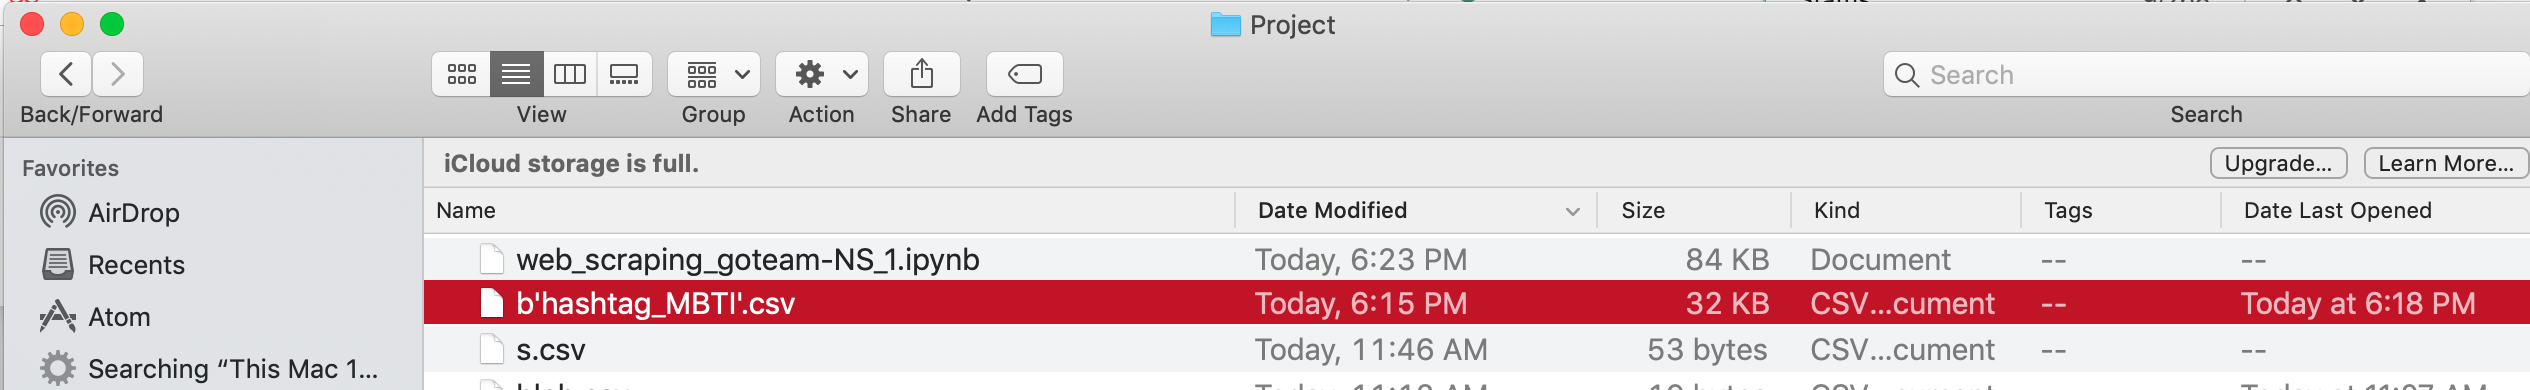

In [50]:
########
from IPython.display import Image
Image("cursor_res.png")


#### More links:

In [ ]:
##
### Search by keyword use cursor mtthod:
https://www.programcreek.com/python/example/76301/tweepy.Cursor


def get_tweets(listOfTweets, keyword, numOfTweets):
    # Iterate through all tweets containing the given word, api search mode
    for tweet in tweepy.Cursor(api.search, q=keyword).items(numOfTweets):
        # Add tweets in this format
        dict_ = {'Screen Name': tweet.user.screen_name,
                'User Name': tweet.user.name,
                'Tweet Created At': unicode(tweet.created_at),
                'Tweet Text': tweet.text,
                'User Location': unicode(tweet.user.location),
                'Tweet Coordinates': unicode(tweet.coordinates),
                'User profile picture': tweet.user.profile_image_url
                }
        listOfTweets.append(dict_)   
    return listOfTweets


## Cleaning the text

#### Can use the code from article mentioned in the beginning :https://bitbucket.org/bplank/wassa2015/src/master/

#### or this for Latent Dirichlet Allocation topic classification per each MBTI type (if we ever do this)



In [8]:
######## So far so good not lets clean this up ###
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
texts = []

Here we are pre-processing the text by creating a tokenizer that splits the documents up into tokens (words or phrases), creating a dictionary of stop words and creating a "stemmer" which stems the words (ie removing "-ing" endings etc. We also remove extraneous "bill related" words such as "propXX_XXXX".

In [11]:
for i in tweettext:
    #print "Processing",i
    # clean and tokenize document string
    tokens = tokenizer.tokenize(i)
    # remove all numbers
    tokens = [x for x in tokens if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]
    # remove structural words
    tokens = [x for x in tokens if len(x) > 1]
    tokens = [x.lower() for x in tokens]
    tokens = [x for x in tokens if 'http' not in x]
    tokens = [x for x in tokens if x not in "_"]
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    # add tokens to list
    texts.append(stemmed_tokens)

dictionaryall = corpora.Dictionary(texts)

corpusall = [dictionaryall.doc2bow(text) for text in texts]

texts[0]

['across',
 'nation',
 'pray',
 'countri',
 'thank',
 'god',
 'unit',
 'state',
 'marin',
 'thank',
 'god',
 'ble',
 'co',
 'mjpnt7hhzf']

This code performs tokenization, stop word removal and number removal and places the corpora into a clean list that will be ready for analysis using the Latent Dirichlet Allocation. 

Notice that there are two sets of texts that are jointly modeled "commercetexts" which are the "business friendly" Chamber of Commerce bills and "nmtexts" which are the New Mexico state referenda.

This code extracts the topic proportion distributions from the joint Chamber of Commerce and New Mexico referendum model and plots the topic proprtions for one Chamber of Commerce bill (top) and one New Mexico referendum.

## Phase II: seaarch for (a) twitter users >> and (b) their tweets
(user ID, user screen_name) self identified as a particular MBTI type.
- Set up the twitter stream to collect the tweets:



- Two steps process:
     - first, retrieve the user screen_name (twitter handle) & and profile pictures urls for users with self-identified MBTI types. Proposed method of search by authors of "1500 twets" was found not really effective: requires a lot of manuall sifting through. Method when search by phrase '\"I am an (MBTI type)\"' (in double quotes) gets better, more automated search.Problem is twitter API only allows scollection of all tweets within the timeframe of 7 days
     - Collection of twitter MBTIs will be done this way:
         - use exact phrase
         - use twitter.cursor method
         - collect every week starting now (usually renders ~30 people per MBTI type timespan of 7 days from today)
         - package the results for each type into csv file named after the type : e.g. i_n_t_j.csv
     - second, once we know users screen_name, collect max 3000 tweets/per user using/modifying code (https://www.promptcloud.com/blog/scrape-twitter-data-using-python-r/)
     
     ... which needs fixing
     



- process/parse json files - borrow code elements from article - leave attributes of each user we want tohave like user profile picture, maybe location, retweets etc(your ideas here...)
- look at tweetes, exclude some (say it talks abut someone else MBTI)
- picture processng. We can separate users with a. picture - face, b.picture - some logo,c.picture -other, d.picture - no profile picture. Having no picture might be related to MBTI type! Picture processign links:

https://www.digitalocean.com/community/tutorials/how-to-detect-and-extract-faces-from-an-image-with-opencv-and-python

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/


we can process picture separately (PLS,PCA - select features with unsupervised learning), like in the article (3D faces): https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5428336/
- do ML on text only
- do ML on pictures only
- combine? 

Your ideas here, PLS:

#### Links
https://github.com/varadhbhatnagar/Emoyto


https://github.com/tweepy/tweepy/issues/935


### Tweepy.Cursor() examples:

https://www.programcreek.com/python/example/76301/tweepy.Cursor

 - ex.19 Download all tweets for an user
        Max is around 3200 tweets
 - ex.26 - put new file into old file


### Search by hashtag (example):



https://github.com/ritvikmath/ScrapingData/blob/master/Scraping%20Twitter%20Data.ipynb

In [52]:
import json
import csv
import tweepy
import re

### Phase II (a): Search for self-identified MBTI type twitter users/their profile pictures etc...

#### Code below catches exact phrase, saves in the file with key word name in it e.g."intj"

In [45]:
## import libraries:
import sys
import datetime
import time
## load your twitter credentials
with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_token = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

"""
INPUTS:
    consumer_key, consumer_secret, access_token, access_token_secret: codes 
    telling twitter that we are authorized to access this data &
    keyword
OUTPUTS:
    spreadsheet (csv)
"""
def search_for_p(consumer_key, consumer_secret, access_token, access_token_secret, key_phrase,p_type,timeframe,days_ago):
    #p=hashtag_phrase.encode()
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_token = info['ACCESS_KEY']
    access_token_secret = info['ACCESS_SECRET']

    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth)
    #get todays date
    
    u=datetime.date.today()
    
    #get the name of the spreadsheet we will write to
    
    #fname = '_'.join(p_type).encode()
    fname = ('_'.join(p_type)+'_'+timeframe).encode()

    #open the spreadsheet we will write to
    with open('%s.csv' % (fname), 'w') as file:
        w = csv.writer(file)

        

        #write header row to spreadsheet
        outfile = open('%s.csv' % (fname),'wt')
        writer=csv.writer(outfile)
        writer.writerow(['timestamp', 'tweet_text', 'username', 'image', 'followers_count'])


        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search, q = key_phrase +' -filter:retweets', \
                                   lang="en", since=u-datetime.timedelta(days_ago),until=u,tweet_mode='extended').items(100):
            writer.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'), tweet.user.profile_image_url, tweet.user.followers_count])


In [40]:
## file name will look like this:
p_type = 'intj'
timeframe = 'Jun_6_15'

fname = ('_'.join(p_type)+'_'+timeframe).encode()
fname

b'i_n_t_j_Jun_6_15'

#### Run code below to create the file b'i_n_t_j_Jun_6_15.csv

In [39]:



p_type = 'intj'

srch = '\"I am an ' + p_type + '\"'
timeframe = 'Jun_6_15'
days_ago = 10


if __name__ == '__main__':
    search_for_p(consumer_key, consumer_secret, access_token, access_token_secret, srch,p_type,timeframe,days_ago)
    
    

### Result:


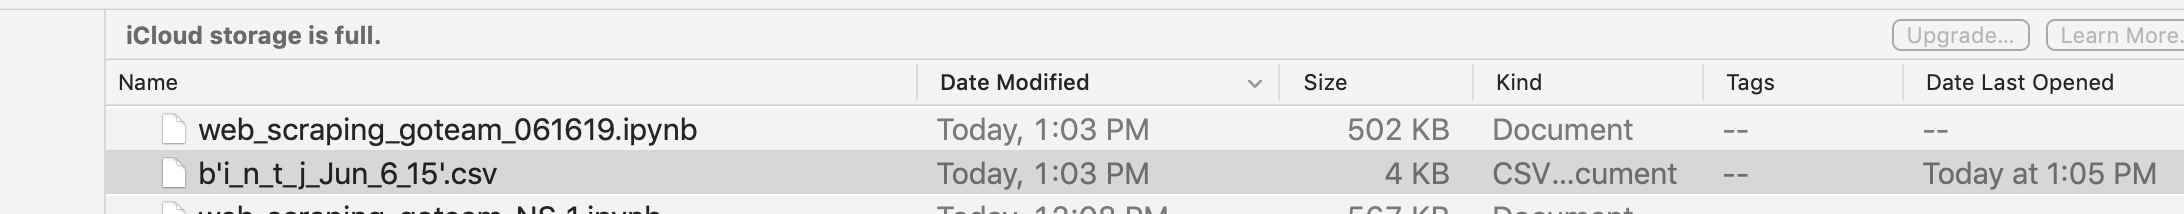

In [42]:
from IPython.display import Image
Image("intj_file.png")

### Setting up catching the MBTI for all types for last 7 days days 

#### As you can see some types are very rare

In [46]:
## only 7 last days tweets could be collected. Need 100 tweets per MBTI type

## copied the list form wikipedia
p_types = 'ISTJ,ISFJ,INFJ,INTJ,ISTP,ISFP,INFP,INTP,ESTP,ESFP,ENFP,ENTP,ESTJ,ESFJ,ENFJ,ENTJ'
## transformed into python list
p_list = p_types.split(',', 16)
#len(p_list)
#p_list

In [44]:
## run search in a loop per each p_type:
for el in p_list:

    #add the  pers. type to "I am an" 
    srch = '\"I am an ' + el + '\"'
    timeframe = 'Jun_6_15'
    days_ago = 10

    
    if __name__ == '__main__':
        search_for_p(consumer_key, consumer_secret, access_token, access_token_secret, srch,el,timeframe,days_ago)
    

### RESULTS

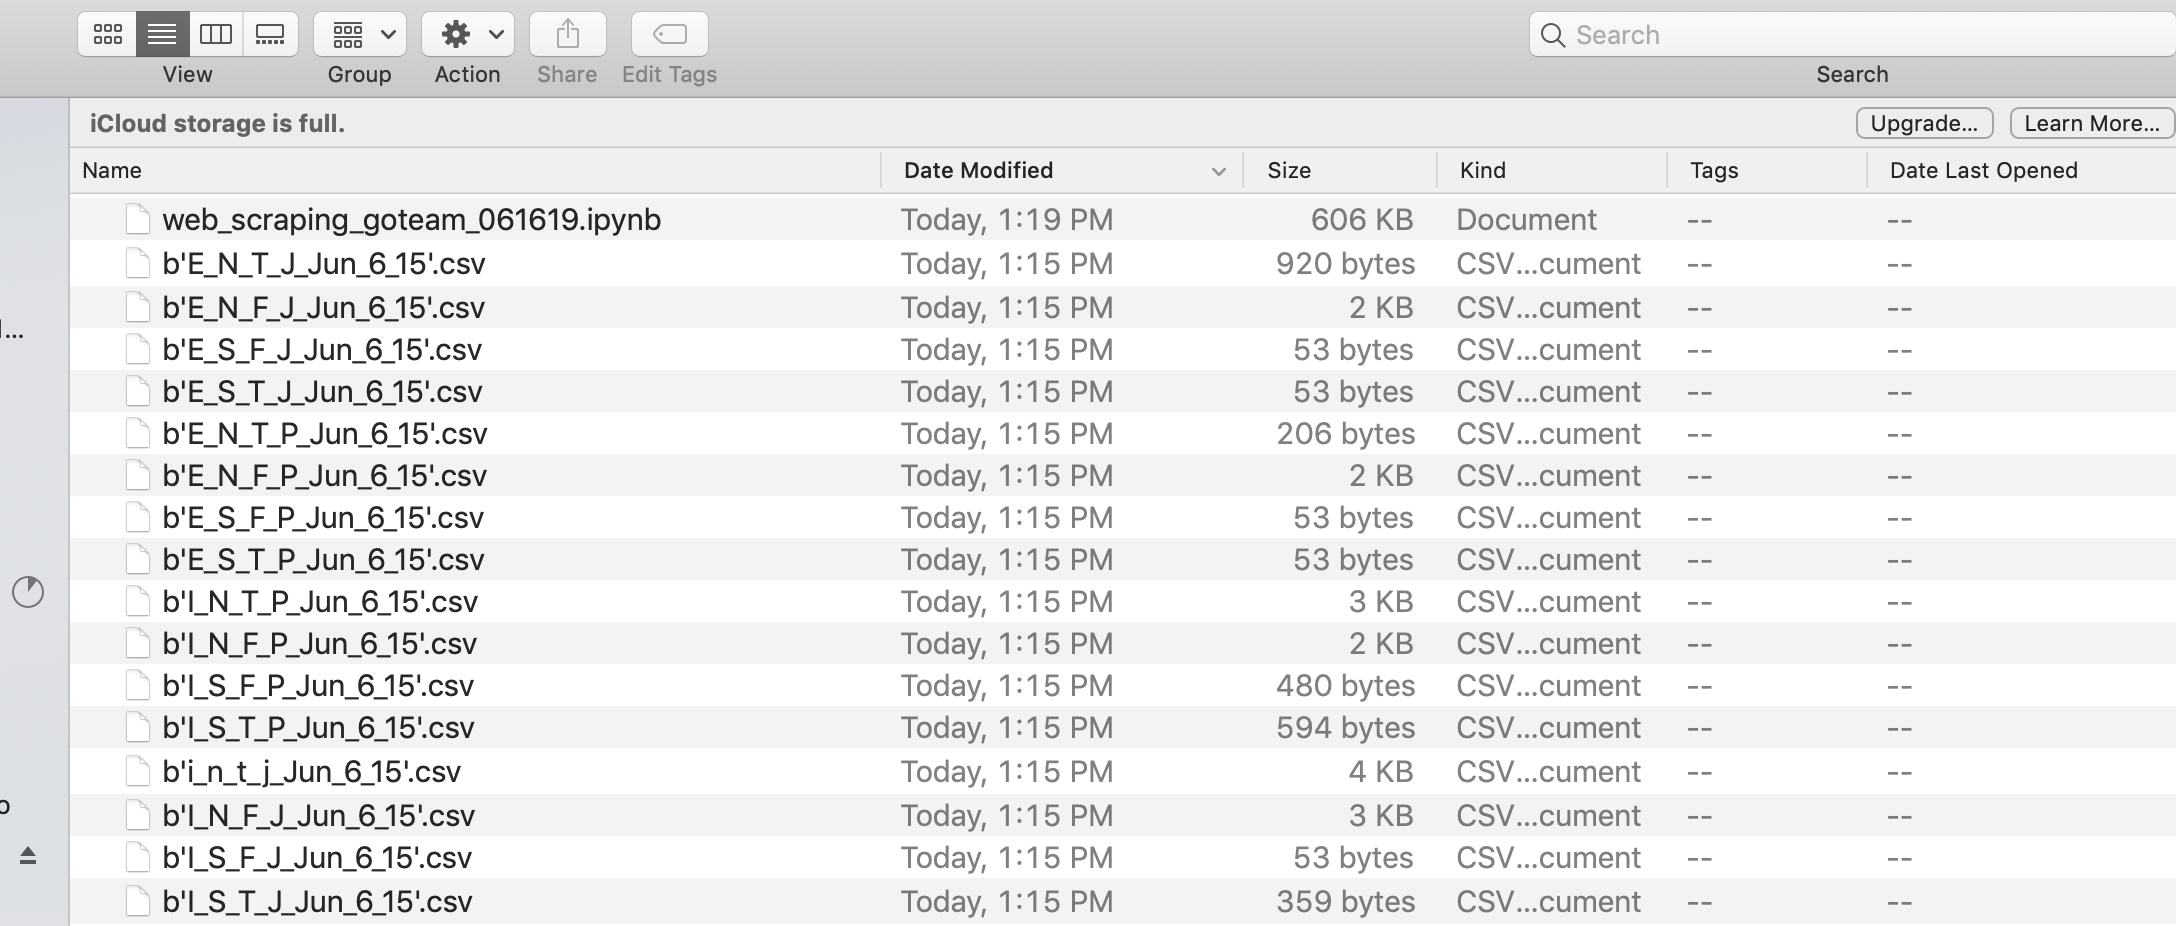

In [47]:
from IPython.display import Image
Image("all_mbti_june_6_16_files.png")

### Phase II (b): Search for tweets from those twitter users identified in Phase II(a)

#####  or we can attempt to search them via survey monkey

#### code(with some variations):



https://github.com/tweepy/tweepy/issues/935
    
https://www.promptcloud.com/blog/scrape-twitter-data-using-python-r/


In [58]:
def get_all_tweets(screen_name):
#Twitter only allows access to a users most recent 3240 tweets with this method

    import tweepy
    import csv

    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_token = info['ACCESS_KEY']
    access_token_secret = info['ACCESS_SECRET']

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    auth.secure = True
    api = tweepy.API(auth)

#initialize a list to hold all the tweepy Tweets
    alltweets = []

#make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200, include_rts=False)
    
#save most recent tweets
    alltweets.extend(new_tweets)

#save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

#keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print("collecting tweets before %s" % (oldest))

	#all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest,tweet_mode = 'extended')

	#save most recent tweets
        alltweets.extend(new_tweets)

	#update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print("...%s tweets downloaded so far" % (len(alltweets)))
        print("##############################################################")
        #uncomment  below if want the tweets printout
        print(alltweets[0])

#transform the tweepy tweets into a 2D array that will populate the csv
    #outtweets = [i.AsDict() for i in alltweets]
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    print("we are here")
#write the csv
    with open('%intj_S7r94.csv' % screen_name, 'wb') as f:
            writer = csv.writer(f)
            writer.writerow(["tweetid","date","text"])
            writer.writerows(outtweets)
    
    from urllib import urlopen

    pass
 ######


### .... Seaarch for tweets for INTJ person, whose screen_name is 'S7r94' (from file i_n_t_j_Jun_6_15.csv)


### Need you all to fix this!

In [59]:

    
if __name__ == '__main__':
    get_all_tweets("S7r94")

collecting tweets before 1047928610290589696
...346 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fi

...539 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize': 

...737 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize': 

...930 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize': 

...1124 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize':

...1320 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize':

...1516 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize':

...1709 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize':

...1905 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize':

...2097 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize':

...2288 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize':

...2475 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize':

...2665 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize':

...2861 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize':

...2895 tweets downloaded so far
##############################################################
Status(_api=<tweepy.api.API object at 0x1a267e7e48>, _json={'created_at': 'Sat Jun 15 22:42:16 +0000 2019', 'id': 1140026767895384064, 'id_str': '1140026767895384064', 'text': 'YEESS 😂! https://t.co/5uTkjUx4qH', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1140026758248501248, 'id_str': '1140026758248501248', 'indices': [9, 32], 'media_url': 'http://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D9IwS-fXkAApkI0.jpg', 'url': 'https://t.co/5uTkjUx4qH', 'display_url': 'pic.twitter.com/5uTkjUx4qH', 'expanded_url': 'https://twitter.com/S7r94/status/1140026767895384064/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 126, 'h': 126, 'resize': 'crop'}, 'medium': {'w': 750, 'h': 126, 'resize': 'fit'}, 'large': {'w': 750, 'h': 126, 'resize': 'fit'}, 'small': {'w': 680, 'h': 114, 'resize':

AttributeError: 'Status' object has no attribute 'text'

### Plan: someone should try to process dataset from "1500 tweets ..." EDA, ML etc...
#### I can do unsupervised learning on it...

https://bitbucket.org/bplank/wassa2015/src/master/